In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('./business_record.csv')

In [2]:
data.head()

,id,entityid,transactionid,user_id,car_id,type,start_time,start_lng,start_lat,end_lng,...,refund_status,is_allow_refund,map_start_lng,map_start_lat,map_end_lng,map_end_lat,fine,discount,remark,valid
0,94156,18,7e5ce163-97a7-4f60-b3fe-33f57adddba3,13121,76,2,2016/6/3 10:13,108.750894,34.014670,108.747022,...,0,0,108.762144,34.019072,108.758242,34.018975,0,0,NaN,0
1,103293,18,46424d53-8fd5-4ecd-90b1-787f7eb2ddbc,11473,70,2,2016/7/2 20:54,108.745663,34.016955,108.745668,...,0,0,108.756871,34.021444,108.756882,34.021441,0,0,NaN,0
2,98452,18,480ccc50-8fff-40ae-ab8b-7bae9b4ff559,25927,70,2,2016/6/19 12:43,108.749987,34.013616,108.749987,...,0,0,108.761224,34.018033,108.761233,34.018033,0,0,NaN,0
3,90155,18,5553a975-d990-47a1-b74e-d20637e0d7bf,27776,70,2,2016/5/17 22:01,108.745447,34.017462,108.745630,...,0,0,108.756652,34.021955,108.756847,34.021932,0,0,NaN,0
4,99609,18,8af22de4-095b-421f-9927-a411d3ecd54d,19927,76,2,2016/6/22 17:40,108.746764,34.014425,108.746764,...,0,0,108.757982,34.018888,108.757990,34.018890,0,0,NaN,0


In [3]:
data.columns

Index(['id', 'entityid', 'transactionid', 'user_id', 'car_id', 'type',
       'start_time', 'start_lng', 'start_lat', 'end_lng', 'end_lat',
       'end_time', 'current_miles', 'stoptime', 'cost', 'moeny', 'bonus',
       'stop_time_count', 'point', 'speed_max', 'speed_avg', 'refund_status',
       'is_allow_refund', 'map_start_lng', 'map_start_lat', 'map_end_lng',
       'map_end_lat', 'fine', 'discount', 'remark', 'valid'],
      dtype='object')

In [6]:
data = data[['id','entityid','car_id','start_time','end_time']]

In [7]:
data.head()

,id,entityid,car_id,start_time,end_time
0,94156,18,76,2016/6/3 10:13,2016/6/3 16:29
1,103293,18,70,2016/7/2 20:54,2016/7/2 20:56
2,98452,18,70,2016/6/19 12:43,2016/6/19 12:56
3,90155,18,70,2016/5/17 22:01,2016/5/17 22:04
4,99609,18,76,2016/6/22 17:40,2016/6/22 17:48


In [10]:
data.start_time.head()

0     2016/6/3 10:13
1     2016/7/2 20:54
2    2016/6/19 12:43
3    2016/5/17 22:01
4    2016/6/22 17:40
Name: start_time, dtype: object

In [12]:
data['date'] = pd.to_datetime(data['start_time'])

In [13]:
data.head()

,id,entityid,car_id,start_time,end_time,date
0,94156,18,76,2016/6/3 10:13,2016/6/3 16:29,2016-06-03 10:13:00
1,103293,18,70,2016/7/2 20:54,2016/7/2 20:56,2016-07-02 20:54:00
2,98452,18,70,2016/6/19 12:43,2016/6/19 12:56,2016-06-19 12:43:00
3,90155,18,70,2016/5/17 22:01,2016/5/17 22:04,2016-05-17 22:01:00
4,99609,18,76,2016/6/22 17:40,2016/6/22 17:48,2016-06-22 17:40:00


In [25]:
data = data.set_index(data.date)

In [26]:
data.head()

,id,entityid,car_id,start_time,end_time,date
date,,,,,,
2016-06-03 10:13:00,94156,18,76,2016/6/3 10:13,2016/6/3 16:29,2016-06-03 10:13:00
2016-07-02 20:54:00,103293,18,70,2016/7/2 20:54,2016/7/2 20:56,2016-07-02 20:54:00
2016-06-19 12:43:00,98452,18,70,2016/6/19 12:43,2016/6/19 12:56,2016-06-19 12:43:00
2016-05-17 22:01:00,90155,18,70,2016/5/17 22:01,2016/5/17 22:04,2016-05-17 22:01:00
2016-06-22 17:40:00,99609,18,76,2016/6/22 17:40,2016/6/22 17:48,2016-06-22 17:40:00


In [30]:
print(data['2016-06-03'].head(10))

                        id  entityid  car_id      start_time        end_time  \
date                                                                           
2016-06-03 10:13:00  94156        18      76  2016/6/3 10:13  2016/6/3 16:29   
2016-06-03 18:14:00  94207        18      75  2016/6/3 18:14  2016/6/3 18:18   
2016-06-03 18:19:00  94209        18      75  2016/6/3 18:19  2016/6/3 18:20   
2016-06-03 15:32:00  94130        18      73  2016/6/3 15:32  2016/6/3 15:32   
2016-06-03 18:34:00  94219        18      75  2016/6/3 18:34  2016/6/3 18:34   
2016-06-03 18:34:00  94220        18      75  2016/6/3 18:34  2016/6/3 18:35   
2016-06-03 20:37:00  94269        18      70  2016/6/3 20:37  2016/6/3 20:41   
2016-06-03 17:49:00  94192        18      75  2016/6/3 17:49  2016/6/3 17:51   
2016-06-03 17:55:00  94195        18      75  2016/6/3 17:55  2016/6/3 17:59   
2016-06-03 14:20:00  94112        18      72  2016/6/3 14:20  2016/6/3 14:26   

                                   date

In [40]:
data.date = data.date.apply(lambda x: str(x)[:10])

In [42]:
data = data.set_index(data.date)

In [43]:
data.head()

,id,entityid,car_id,start_time,end_time,date
date,,,,,,
2016-06-03,94156,18,76,2016/6/3 10:13,2016/6/3 16:29,2016-06-03
2016-07-02,103293,18,70,2016/7/2 20:54,2016/7/2 20:56,2016-07-02
2016-06-19,98452,18,70,2016/6/19 12:43,2016/6/19 12:56,2016-06-19
2016-05-17,90155,18,70,2016/5/17 22:01,2016/5/17 22:04,2016-05-17
2016-06-22,99609,18,76,2016/6/22 17:40,2016/6/22 17:48,2016-06-22


In [45]:
data.groupby('date').head()

,id,entityid,car_id,start_time,end_time,date
date,,,,,,
2016-06-03,94156,18,76,2016/6/3 10:13,2016/6/3 16:29,2016-06-03
2016-07-02,103293,18,70,2016/7/2 20:54,2016/7/2 20:56,2016-07-02
2016-06-19,98452,18,70,2016/6/19 12:43,2016/6/19 12:56,2016-06-19
2016-05-17,90155,18,70,2016/5/17 22:01,2016/5/17 22:04,2016-05-17
2016-06-22,99609,18,76,2016/6/22 17:40,2016/6/22 17:48,2016-06-22
2016-05-21,91006,18,69,2016/5/21 15:38,2016/5/21 15:39,2016-05-21
2015-11-10,37199,18,77,2015/11/10 13:36,2015/11/10 13:36,2015-11-10
2016-01-18,65770,18,68,2016/1/18 21:25,2016/1/18 21:26,2016-01-18
2016-07-04,103871,18,75,2016/7/4 13:04,2016/7/4 13:04,2016-07-04


In [54]:
df.drop('date',axis = 1,inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [61]:
df.reset_index(inplace = True)

In [62]:
df.head()

,date,id,entityid,car_id,start_time,end_time
0,2016-06-03,94156,18,76,2016/6/3 10:13,2016/6/3 16:29
1,2016-07-02,103293,18,70,2016/7/2 20:54,2016/7/2 20:56
2,2016-06-19,98452,18,70,2016/6/19 12:43,2016/6/19 12:56
3,2016-05-17,90155,18,70,2016/5/17 22:01,2016/5/17 22:04
4,2016-06-22,99609,18,76,2016/6/22 17:40,2016/6/22 17:48


In [68]:
df.groupby('date').aggregate('count')

,id,entityid,car_id,start_time,end_time
date,,,,,
2015-10-18,1,1,1,1,1
2015-10-20,1,1,1,1,1
2015-10-21,4,4,4,4,4
2015-10-22,12,12,12,12,12
2015-10-23,53,53,53,53,53
2015-10-24,25,25,25,25,25
2015-10-25,47,47,47,47,47
2015-10-26,73,73,73,73,73
2015-10-27,80,80,80,80,80


In [78]:
res = df.groupby('date').aggregate('count').reset_index()
res.head()

,date,id,entityid,car_id,start_time,end_time
0,2015-10-18,1,1,1,1,1
1,2015-10-20,1,1,1,1,1
2,2015-10-21,4,4,4,4,4
3,2015-10-22,12,12,12,12,12
4,2015-10-23,53,53,53,53,53


In [80]:
res = res[['date','id']]

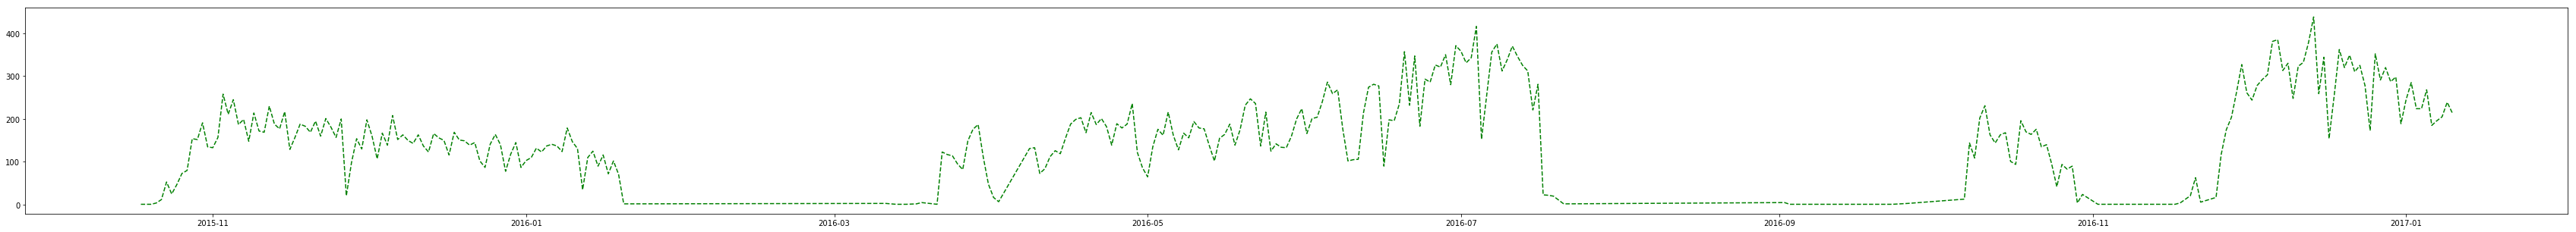

In [100]:
import matplotlib.pyplot as plt
plt.figure(figsize=(60,5)) 
x = pd.to_datetime(res.date)
y = res.id
plt.plot(x,y,'k--',color = 'g')
plt.show()

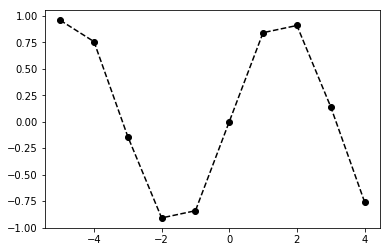

In [189]:

x = np.arange(-5.0, 5.0, 1)
y1 = np.sin(x)
y1 = list(y1)
plt.plot(x, y1,'ko--')
plt.show()

In [195]:
import holtwinters
from holtwinters import *
y, alpha, beta,gama, rmse = additive(y1,5,5)

In [196]:
y1.extend(y)

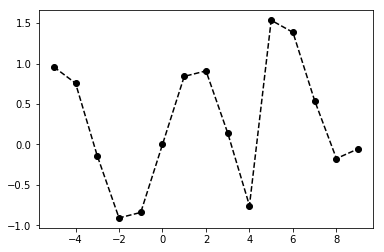

In [197]:
x1 = x = np.arange(-5.0, 10, 1)
plt.plot(x1, y1,'ko--')
plt.show()